In [131]:
from intelligent_placer_lib.placer import *

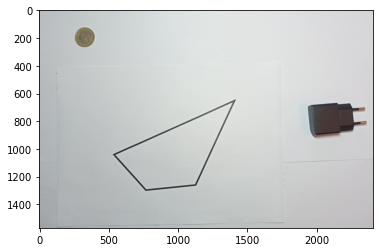

In [166]:
im = get_images('tests')

plt.imshow(im[-9])

image = im[-9]

In [167]:
def GetPolyFromMask(image):
    contours,_=cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.004 * perimeter, True)
    approx.shape = (-1, 2)
    return approx

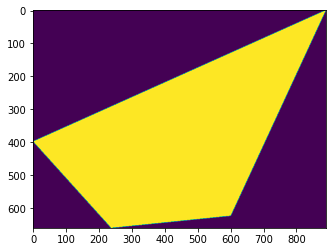

In [168]:


box, rect = find_poly(image)

plt.imshow(rect)


In [188]:

points = GetPolyFromMask(rect)
print(points)

def GetAngles(points):
    # Находим вектора сторон
    vectors1 = points - np.roll(points, 1, axis=0)
    vectors2 = np.roll(vectors1, -1, axis=0) # нам нужны теперь соседние с vectors1 вектора, так что "прокрутим" vectors1 

    # Найдем нормы векторов
    norms1 = np.linalg.norm(vectors1, axis=1)
    norms2 = np.linalg.norm(vectors2, axis=1)
    
    # Найдем теперь углы через скалярное произведение
    cross_products = np.cross(vectors1, vectors2) / (norms1 * norms2)
    angles_rads = abs(np.arcsin(cross_products)) # нам нужен внутренний угол, так что берем arsin
    angles = angles_rads / np.pi * 180
    
    return angles

angles_degrees = GetAngles(points)
print("Координаты и углы")
print(np.hstack([points, angles_degrees.reshape((-1, 1))]))

[[889   0]
 [  0 398]
 [237 660]
 [600 623]]
Координаты и углы
[[889.           0.          40.99637082]
 [  0.         398.          71.98590984]
 [237.         660.          53.68809785]
 [600.         623.          59.2941828 ]]


In [189]:
wf = filter_items(image, box)
masks, areas = get_masks(wf)

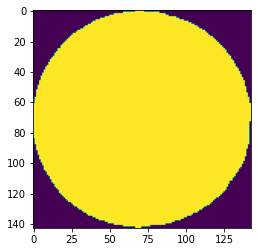

Координаты и углы
[[ 67.           0.          21.74077905]
 [ 41.           6.          17.96913974]
 [ 26.          15.          14.03624347]
 [ 16.          25.          17.59242456]
 [  2.          52.          23.71618945]
 [  0.          83.          22.12633481]
 [  7.         104.          18.86899946]
 [ 23.         125.          21.73229519]
 [ 43.         137.          20.47227952]
 [ 70.         142.          24.11847187]
 [103.         134.          22.84223953]
 [126.         117.          22.95153874]
 [139.          95.          25.5367758 ]
 [142.          61.          24.22145909]
 [134.          38.          19.81198602]
 [117.          17.          22.56607733]
 [ 93.           4.          19.69676636]]


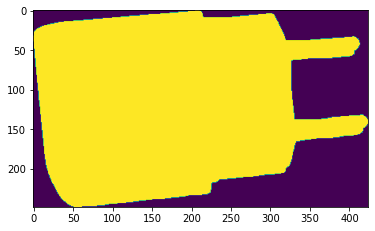

Координаты и углы
[[411.          36.          62.17590362]
 [320.          38.          63.36177418]
 [302.           4.          65.43013321]
 [216.           9.          59.63733672]
 [210.           0.          62.04903097]
 [ 11.          20.          54.19231868]
 [  0.          39.          37.47231167]
 [ 23.         216.          25.21551422]
 [ 39.         241.          39.73063271]
 [ 61.         248.          23.39639343]
 [220.         232.          44.15282324]
 [236.         213.          44.25854302]
 [317.         205.          62.55804108]
 [333.         165.          62.26706359]
 [410.         157.          39.06847308]
 [422.         145.          66.03751103]
 [417.         132.          72.95340207]
 [331.         138.          89.06196942]
 [327.          63.          89.13463365]
 [400.          58.          59.51669996]]


In [190]:
for mask in masks:
    plt.imshow(mask)
    plt.show()
    mask = mask.astype(int)
    mask *= 255
    points = GetPolyFromMask( mask.astype(np.uint8))
   
    angles_degrees = GetAngles(points)
    print("Координаты и углы")
    print(np.hstack([points, angles_degrees.reshape((-1, 1))]))